In [20]:
import pandas as pd
import numpy as np
import hidden

In [69]:
import psycopg2

# Load the secrets
secrets = hidden.secrets()

conn = psycopg2.connect(host=secrets['host'],
        port=secrets['port'],
        database=secrets['database'],
        user=secrets['user'],
        password=secrets['pass'],
        connect_timeout=3)

# Create a cursor object to interact with the database
cur = conn.cursor()

# Execute a SELECT query
cur.execute("SELECT * FROM emp_happiness;")

# Fetch all the rows from the result set
rows = cur.fetchall()

# Close the cursor and the connection
cur.close()
conn.close()

# Convert the fetched data into a pandas DataFrame
df = pd.DataFrame(rows)

# Print the DataFrame
print(df)
conn.close()


          0                  1            2             3      4  5
0         1   Mobile Developer  $617,916.00        Senior   True  5
1         2         BI Analyst  $715,617.00        Junior  False  2
2         3  Software Engineer  $733,555.00  Intermediate   True  4
3         4         BI Analyst  $469,200.00        Senior  False  2
4         5   Mobile Developer  $464,303.00        Senior   True  4
...     ...                ...          ...           ...    ... ..
9995   9996        QA Engineer  $479,050.00        Junior   True  1
9996   9997         BI Analyst  $364,932.00        Junior   True  1
9997   9998         HR Manager  $475,838.00        Senior  False  1
9998   9999        AI Engineer  $397,313.00  Intermediate  False  1
9999  10000   Mobile Developer  $132,553.00        Senior  False  2

[10000 rows x 6 columns]


In [71]:
df.columns = ['id', 'occupation', 'salary', 'level', 'vacation', 'happiness']
df.head()

,id,occupation,salary,level,vacation,happiness
0,1,Mobile Developer,"$617,916.00",Senior,True,5
1,2,BI Analyst,"$715,617.00",Junior,False,2
2,3,Software Engineer,"$733,555.00",Intermediate,True,4
3,4,BI Analyst,"$469,200.00",Senior,False,2
4,5,Mobile Developer,"$464,303.00",Senior,True,4


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          10000 non-null  int64 
 1   occupation  10000 non-null  object
 2   salary      10000 non-null  object
 3   level       10000 non-null  object
 4   vacation    10000 non-null  bool  
 5   happiness   10000 non-null  int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 400.5+ KB


In [73]:
df['salary'] = df.salary.str.strip('$').str.replace(',', '').str.replace('.00', '').astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          10000 non-null  int64 
 1   occupation  10000 non-null  object
 2   salary      10000 non-null  int64 
 3   level       10000 non-null  object
 4   vacation    10000 non-null  bool  
 5   happiness   10000 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 400.5+ KB


In [74]:
df.drop('id', inplace=True, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   occupation  10000 non-null  object
 1   salary      10000 non-null  int64 
 2   level       10000 non-null  object
 3   vacation    10000 non-null  bool  
 4   happiness   10000 non-null  int64 
dtypes: bool(1), int64(2), object(2)
memory usage: 322.4+ KB


In [75]:
df.to_csv("employee happiness.csv", index=False)

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: xlabel='occupation', ylabel='salary'>

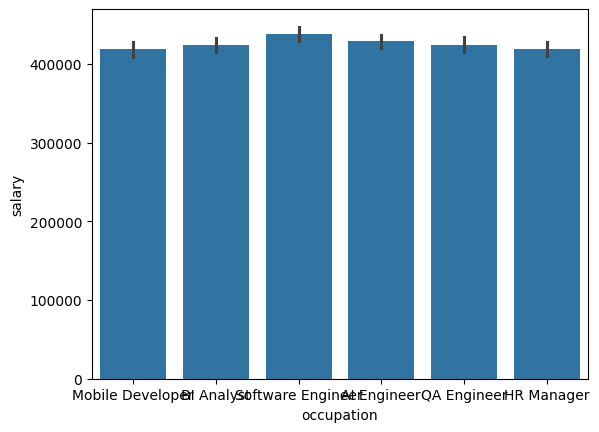

In [56]:
sns.barplot(x='occupation', y='salary', data=df)

<Axes: xlabel='happiness', ylabel='salary'>

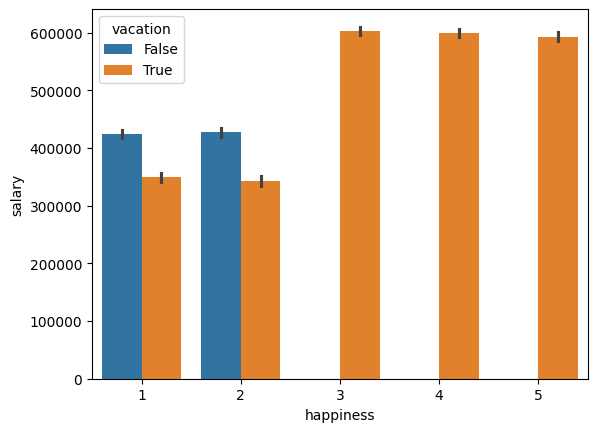

In [57]:
sns.barplot(x='happiness', y='salary', hue='vacation', data=df)

<Axes: xlabel='level', ylabel='happiness'>

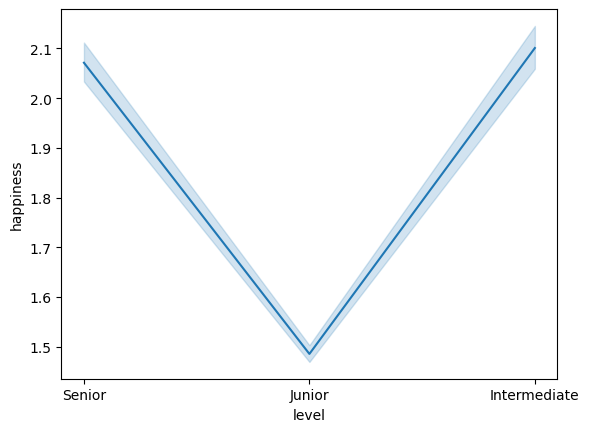

In [58]:
sns.lineplot(x='level', y='happiness', data=df)

In [59]:
df.head()

,occupation,salary,level,vacation,happiness
0,Mobile Developer,617916,Senior,True,5
1,BI Analyst,715617,Junior,False,2
2,Software Engineer,733555,Intermediate,True,4
3,BI Analyst,469200,Senior,False,2
4,Mobile Developer,464303,Senior,True,4


In [60]:
# Encode 'occupation' column
df['occupation'] = np.where(df['occupation'] == 'AI Engineer', 0,
                                   np.where(df['occupation'] == 'Mobile Developer', 1,
                                            np.where(df['occupation'] == 'Software Engineer', 2,
                                                     np.where(df['occupation'] == 'BI Analyst', 3,
                                                              np.where(df['occupation'] == 'QA Engineer', 4, 5)))))

# Encode 'level' column
df['level'] = np.where(df['level'] == 'Junior', 0,
                              np.where(df['level'] == 'Intermediate', 1, 2))

# Encode 'vacation' column
df['vacation'] = np.where(df['vacation'] == False, 0, 1)

df.head()


,occupation,salary,level,vacation,happiness
0,1,617916,2,1,5
1,3,715617,0,0,2
2,2,733555,1,1,4
3,3,469200,2,0,2
4,1,464303,2,1,4


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [62]:
X = df.drop(['happiness'], axis=1)
y = df['happiness']

# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of train and test datasets
print("Train dataset shape:", X_train.shape)
print("Test dataset shape:", X_test.shape)


Train dataset shape: (8000, 4)
Test dataset shape: (2000, 4)


In [63]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), SVC(), GaussianNB(), MultinomialNB()] 

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\n\n")

LogisticRegression()
Accuracy: 0.428



DecisionTreeClassifier()
Accuracy: 0.4865



RandomForestClassifier()
Accuracy: 0.475



GradientBoostingClassifier()
Accuracy: 0.4695



SVC()
Accuracy: 0.428



GaussianNB()
Accuracy: 0.428



MultinomialNB()
Accuracy: 0.4255





In [66]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)


array([[427, 429,   0,   0,   0],
       [411, 435,   0,   0,   0],
       [  0,   0,  33,  38,  32],
       [  0,   0,  31,  39,  30],
       [  0,   0,  24,  34,  37]])

In [67]:
model.predict([[0, 250000, 1, 0]])[0]

/Users/ifeoluwaoduwaiye/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


2

In [68]:
import pickle

# Save the model to a pickle file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)